In [130]:
import pandas

# Достаем таблицу
table = pandas.read_csv('cian_parsed.csv')

# Убираем дубликаты
table = table.drop_duplicates()

# Считаем цену за квадратный метр, потому что парсер не спарсил
table['price_per_meter'] = table['price'] / table['total_meters'].astype(int)

# Убираем не нужные нам данные, часть полезных к сожалению тоже
table.drop(['deal_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'object_type', 'residential_complex'], axis=1, inplace=True)

# Отображаем
table.head(10000)

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,house_material_type,finish_type,living_meters,kitchen_meters,district,street,underground,price_per_meter
0,developer,Москва,2,16,1,45.0,23274675.0,2024,Монолитно-кирпичный,Без отделки,"16,4 м²","14,6 м²",Филевский парк,Береговой проезд,Фили,517215.000000
1,real_estate_agent,Москва,9,40,1,41.5,32000000.0,-1,-1,-1,"23,4 м²","4,9 м²",Хорошевский,Ленинградский проспект,ЦСКА,780487.804878
2,real_estate_agent,Москва,11,12,1,33.5,8000000.0,1972,-1,-1,17 м²,7 м²,Чертаново Южное,3-й Дорожный проезд,Улица Академика Янгеля,242424.242424
3,developer,Москва,3,26,1,23.9,22602971.0,2027,Монолитный,"Без отделки, предчистовая, чистовая",-1,-1,Даниловский,NaN,Павелецкая,982737.869565
4,real_estate_agent,Москва,13,41,1,41.5,31000000.0,-1,-1,-1,"23,4 м²","4,9 м²",Хорошевский,Ленинградский проспект,Аэропорт,756097.560976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,homeowner,Долгопрудный,4,5,1,31.0,5500000.0,1965,-1,-1,"18,5 м²","5,5 м²",NaN,Нефтяников,Шереметьевская,177419.354839
515,homeowner,Долгопрудный,5,17,1,42.4,9850000.0,2006,-1,-1,"22,9 м²",12 м²,NaN,Новый бульвар,Долгопрудная,234523.809524
516,real_estate_agent,Долгопрудный,9,17,1,42.3,10900000.0,2008,-1,-1,"16,3 м²","13,9 м²",NaN,Новый бульвар,Долгопрудная,259523.809524
517,NaN,Долгопрудный,20,23,1,34.5,8856464.0,2026,Монолитный,"Без отделки, чистовая",-1,-1,NaN,NaN,Хлебниково,260484.235294


## Зависимость цены квадратного метра в зависимости от параметров

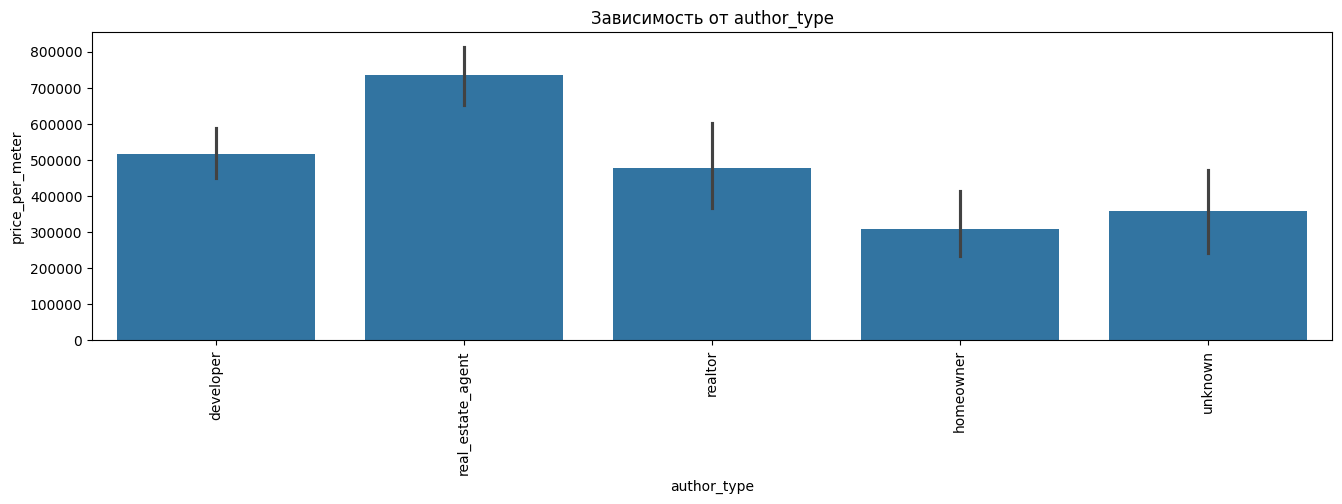

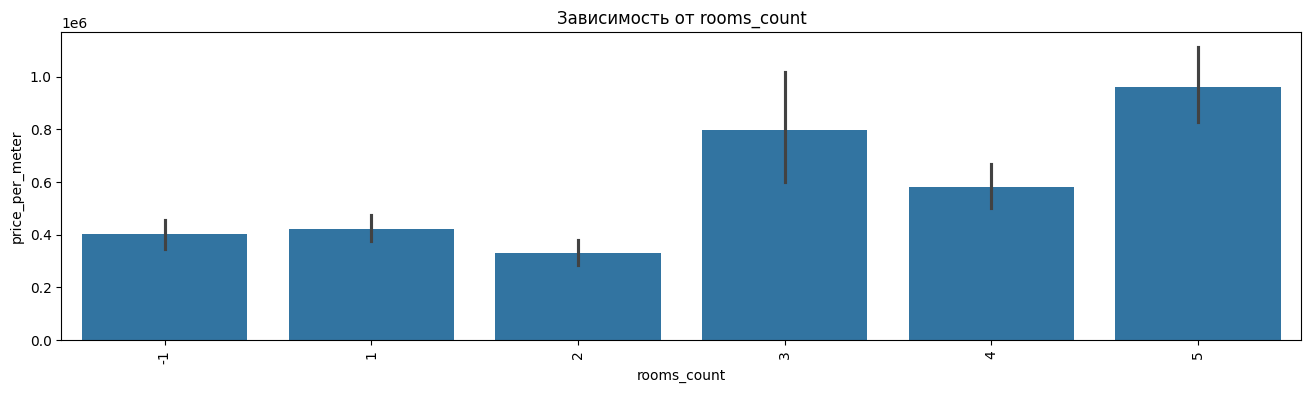

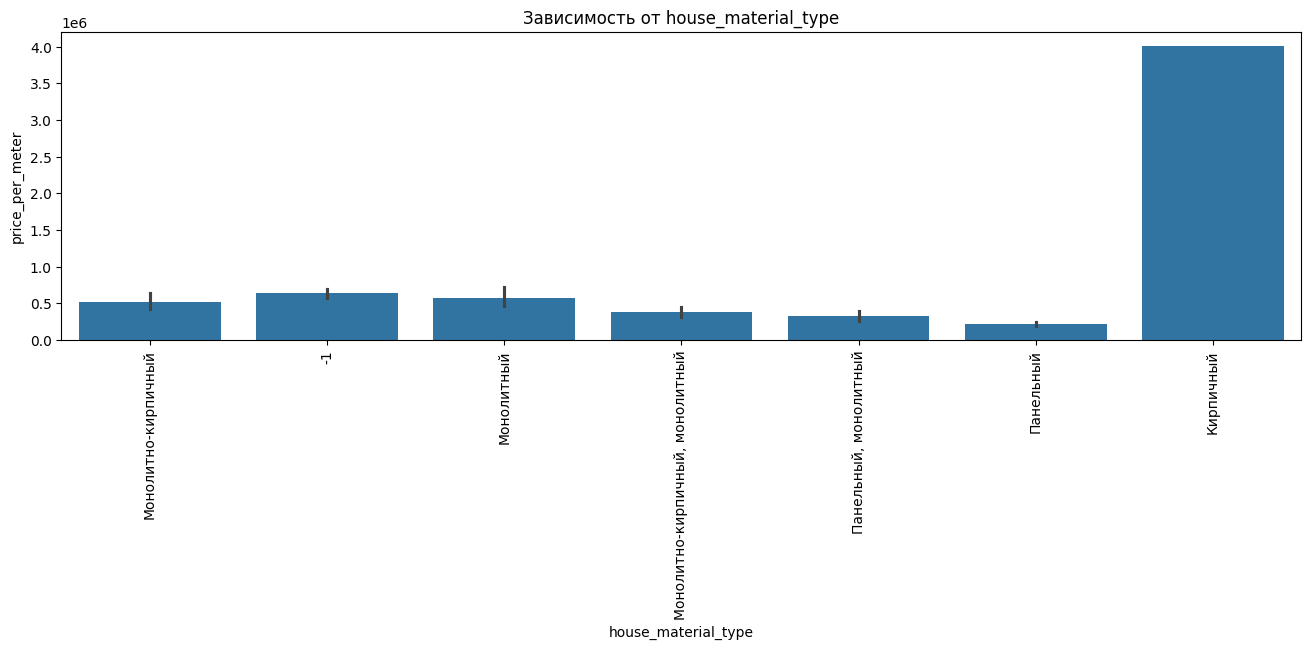

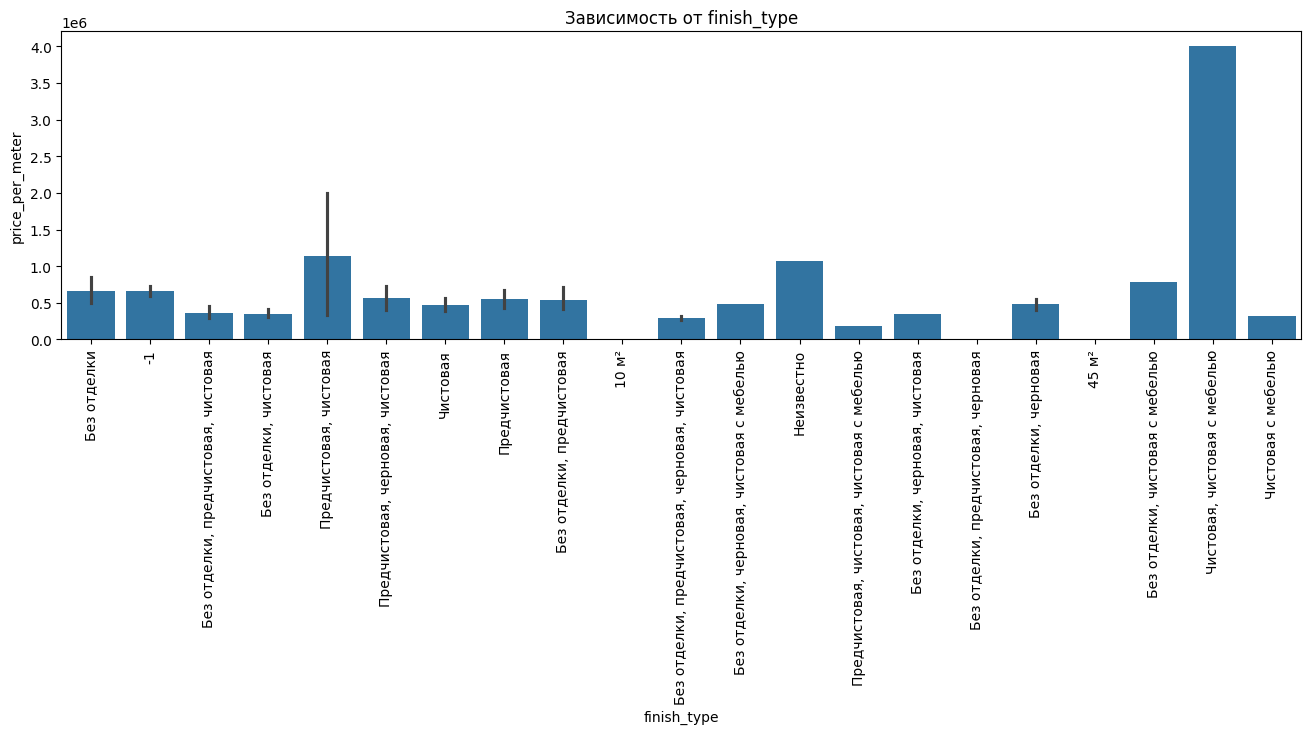

In [128]:
import matplotlib.pyplot as mpl
import seaborn as sns
columns_to_plot = ['author_type', 'rooms_count', 'house_material_type', 'finish_type']
for column in columns_to_plot:
    mpl.figure(figsize=(16, 4))
    sns.barplot(data=table, x=column, y='price_per_meter')
    mpl.title(f'Зависимость от {column}')
    mpl.xlabel(column)
    mpl.xticks(rotation=90)
    mpl.ylabel('price_per_meter')
    mpl.show()

## Зависимость цены квадратного метра в зависимости от параметров

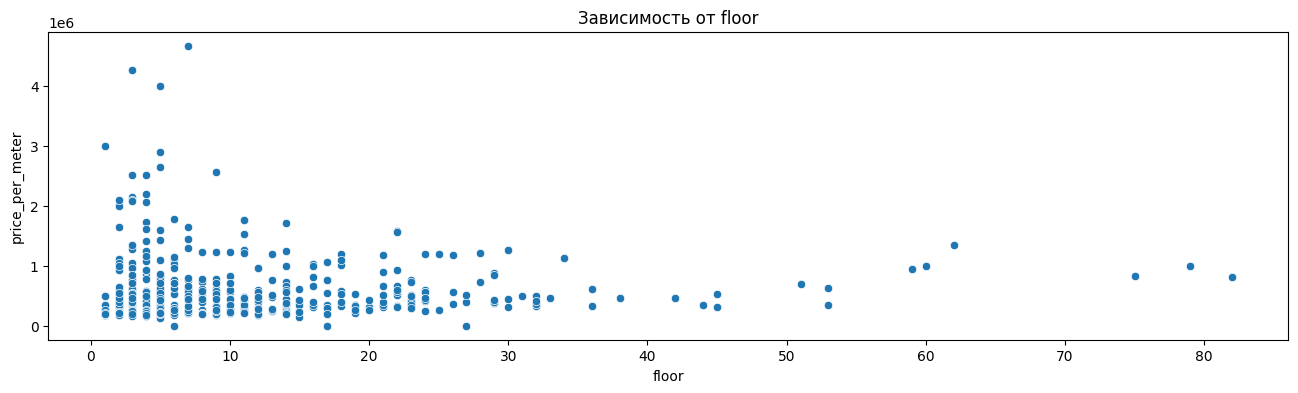

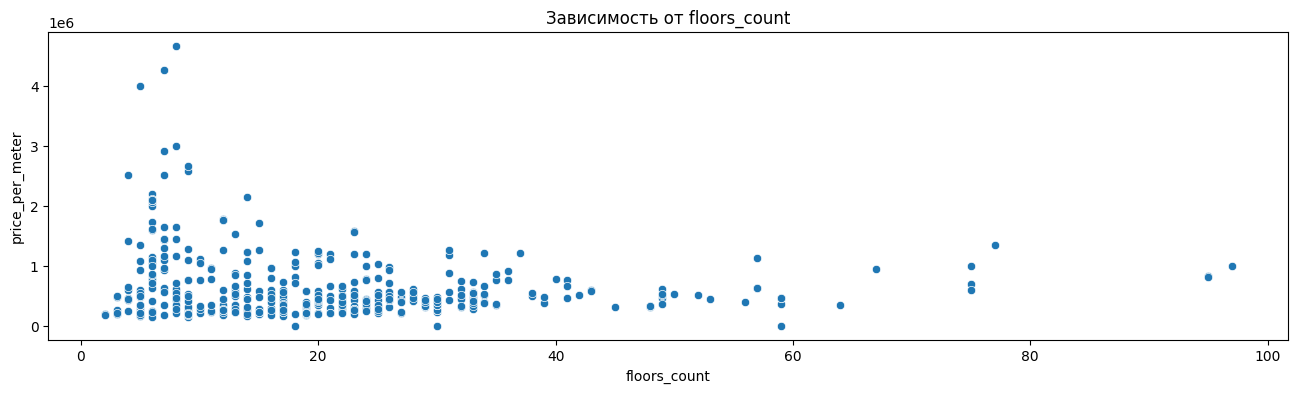

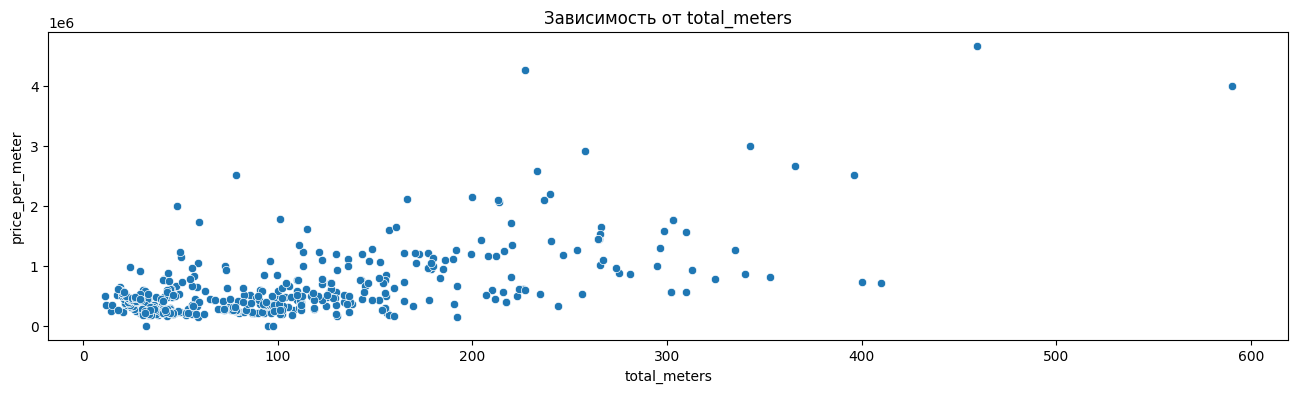

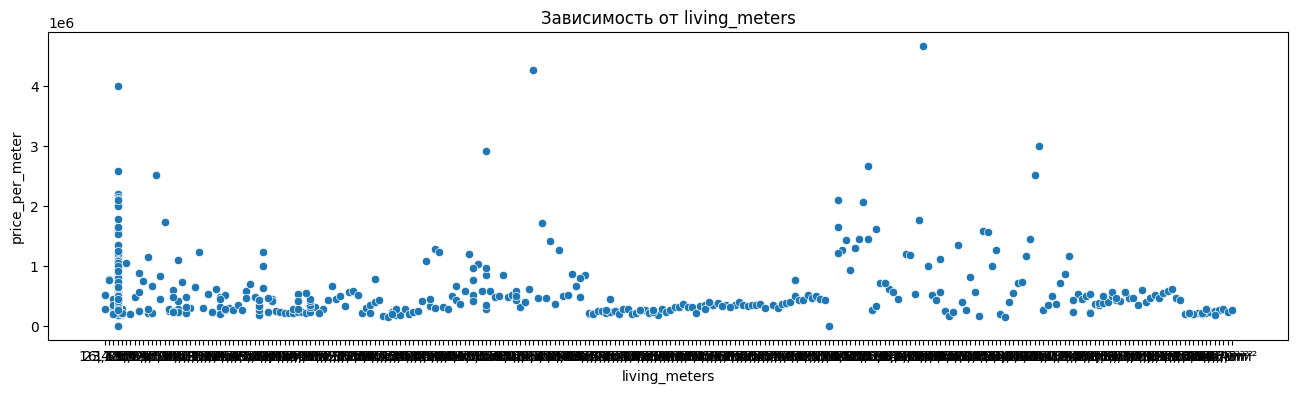

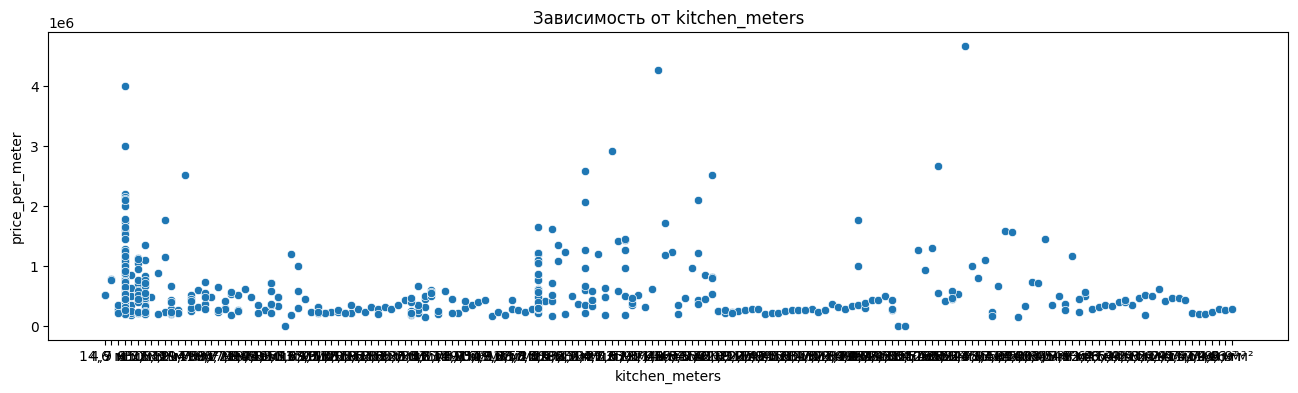

In [129]:
columns_to_plot = ['floor','floors_count','total_meters', "living_meters", "kitchen_meters"]
for column in columns_to_plot:
    mpl.figure(figsize=(16, 4))
    sns.scatterplot(data=table, x=column, y='price_per_meter')
    mpl.title(f'Зависимость от {column}')
    mpl.xlabel(column)
    mpl.ylabel('price_per_meter')
    mpl.show()

## Зависимость цены квадратного метра в зависимости от географического расположения

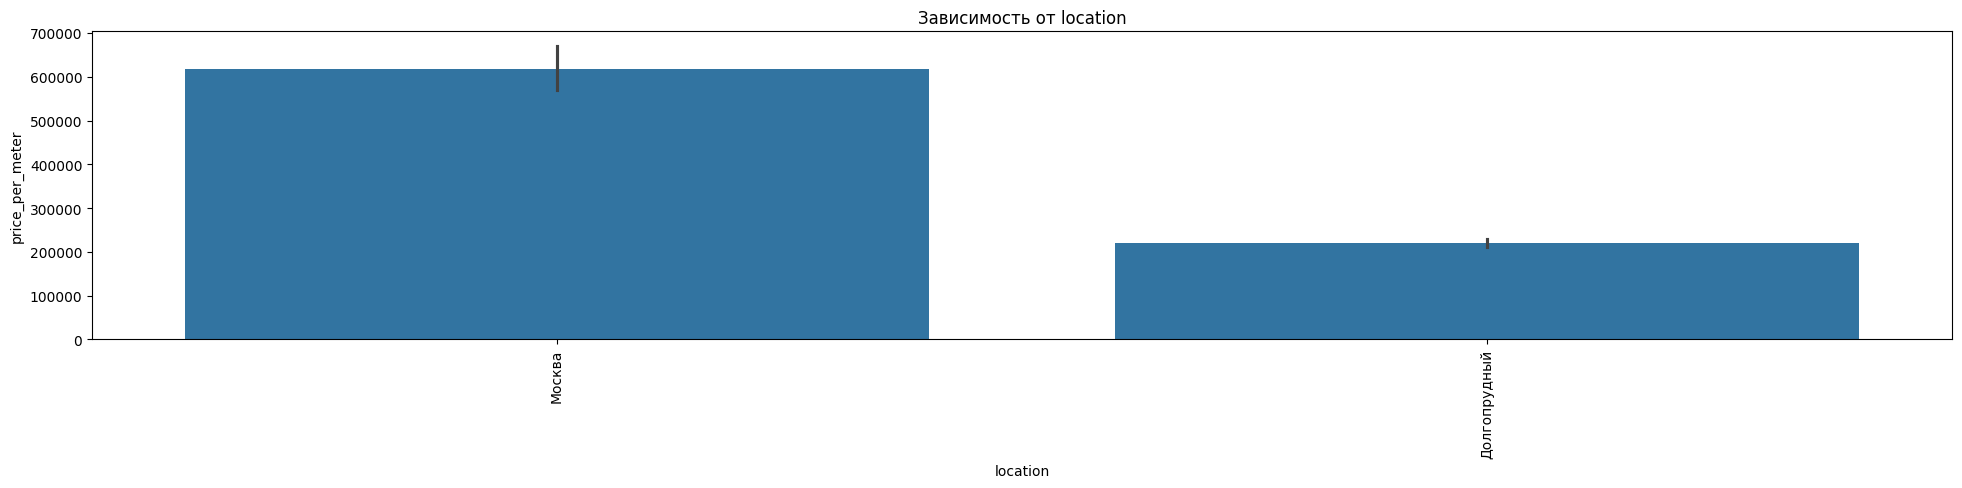

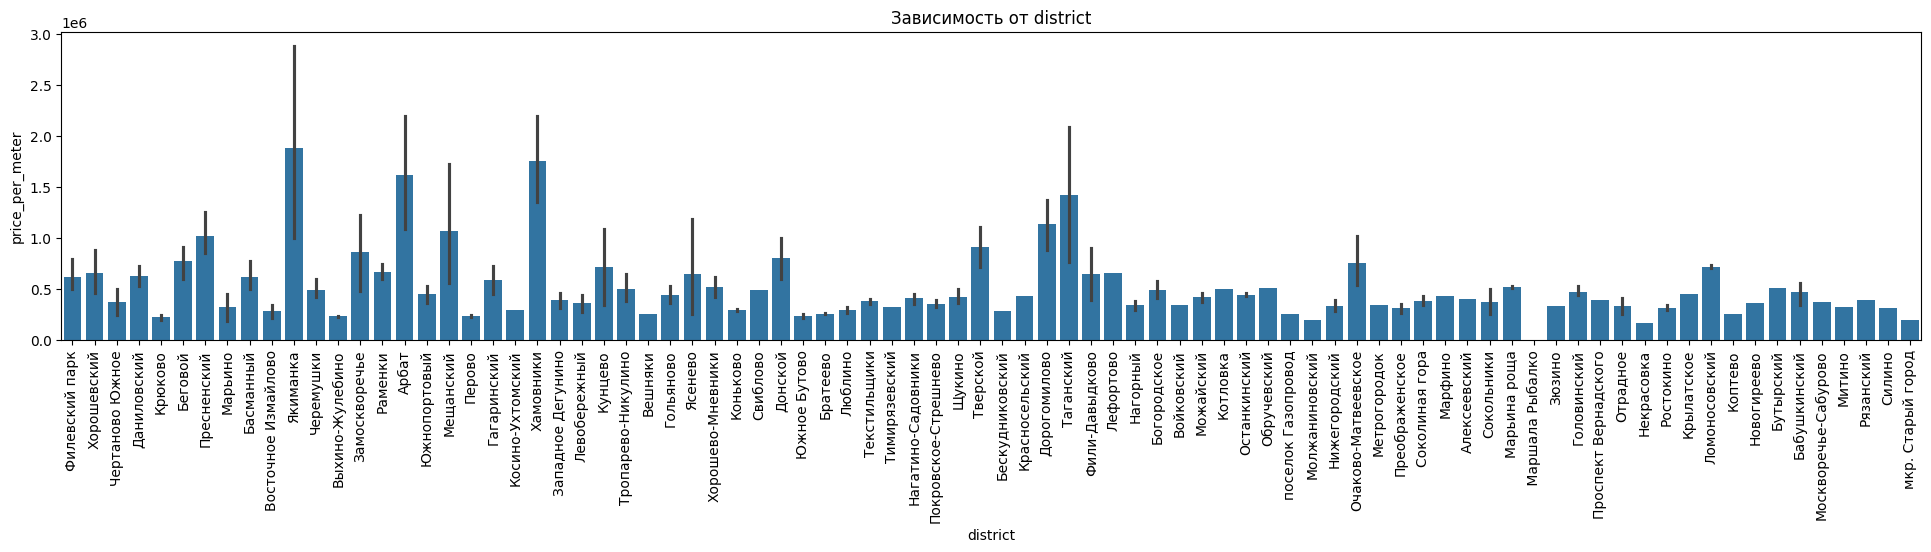

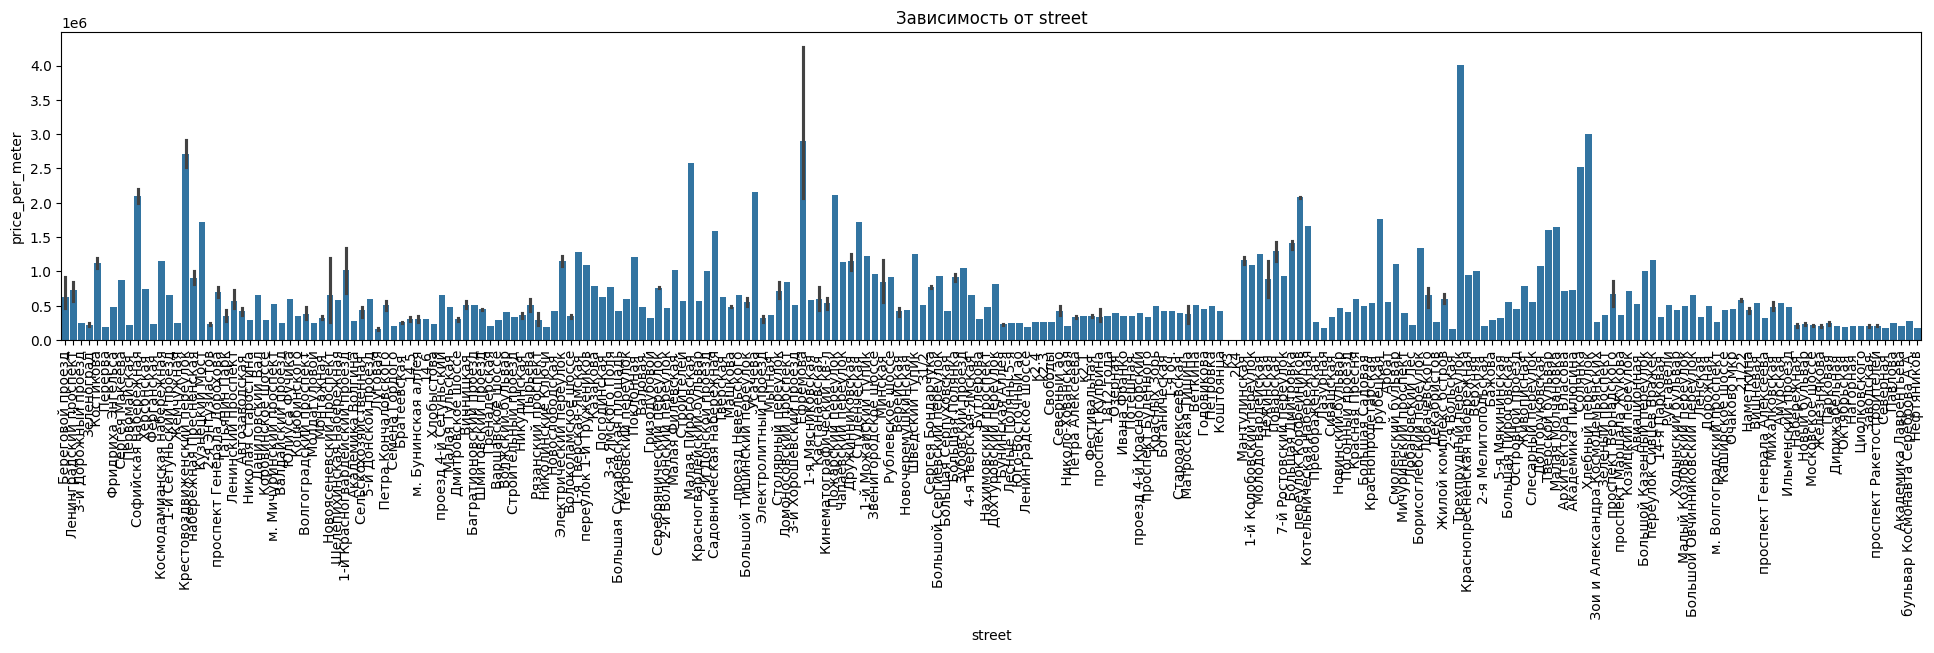

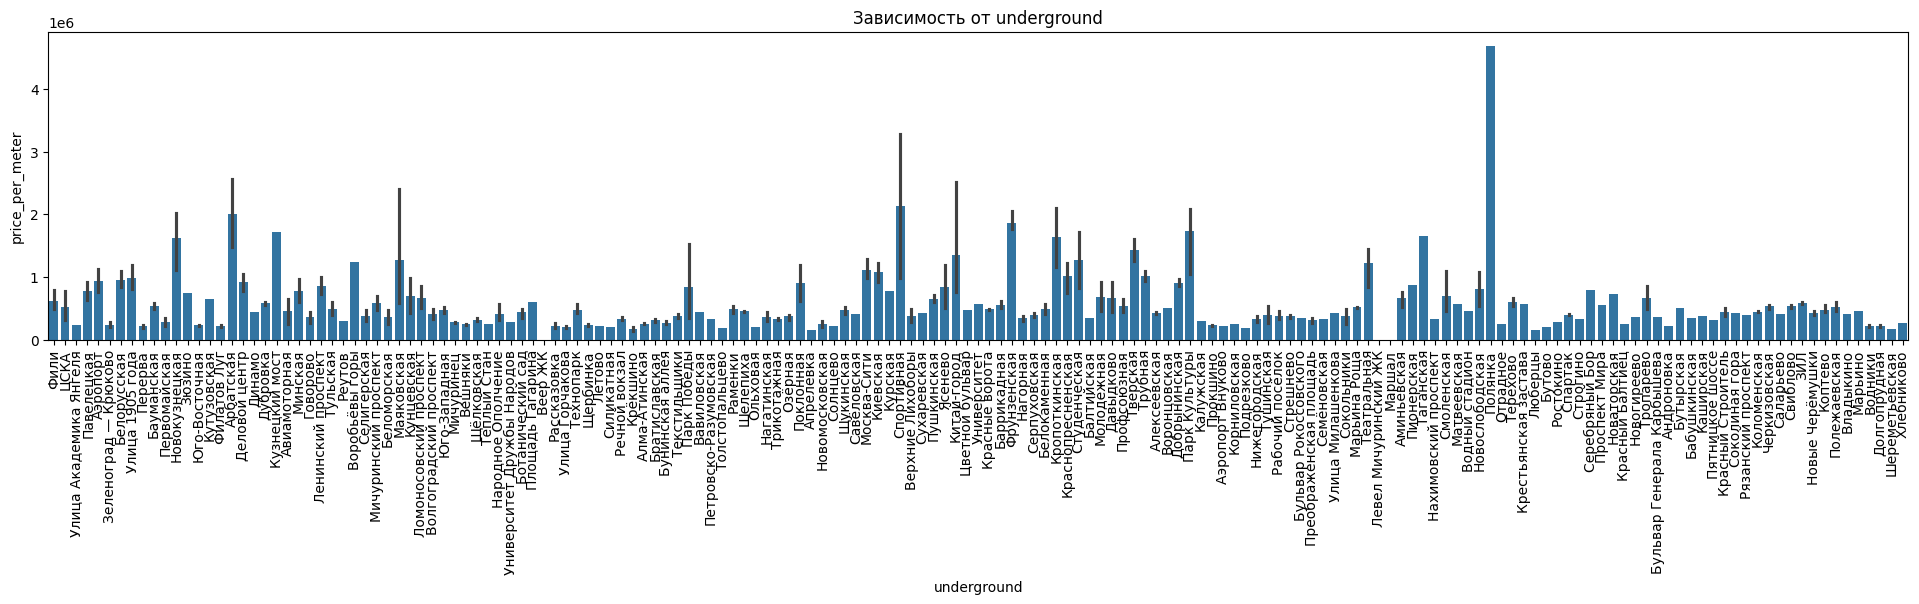

In [127]:
columns_to_plot = ['location', 'district', 'street', 'underground']
for column in columns_to_plot:
    mpl.figure(figsize=(24, 4))
    sns.barplot(data=table, x=column, y='price_per_meter')
    mpl.title(f'Зависимость от {column}')
    mpl.xlabel(column)
    mpl.xticks(rotation=90)
    mpl.ylabel('price_per_meter')
    mpl.show()